In [21]:
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense,Activation,Dropout,MaxPool2D,Flatten,Conv2D
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adagrad
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import joblib

In [10]:
pip install flask-restful

Note: you may need to restart the kernel to use updated packages.


In [11]:
from flask import jsonify,Flask, Request
from flask_restful import Api, Resource

In [3]:
def get_data():
        
    img_width, img_height = 150,150
    batch_size = 128
    labels = ['Black_Soil','Cinder_Soil','Laterite_Soil','Peat_Soil','Yellow_Soil']
    path = "C:\\Users\\Sarany]a.Sakkarapani\\Downloads\\archive\\Soil_Types"
    train_data_dir =  'C:/Users/Saranya.Sakkarapani/Downloads/archive/Soil_Types/Train/'
    test_data_dir = "C:\\Users\\Saranya.Sakkarapani\\Downloads\\archive\\Soil_Types\\Test"
    
    traingen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, horizontal_flip = True, zoom_range = 0.2)
    testgen = ImageDataGenerator(rescale = 1./255)
    
    
    train = traingen.flow_from_directory(train_data_dir, target_size = (img_height,img_width), 
                                         classes = labels, class_mode = 'categorical',
                                         batch_size = batch_size,shuffle = True)
    test = testgen.flow_from_directory(test_data_dir, target_size = (img_height,img_width), 
                                       classes = labels, class_mode = 'categorical',
                                       batch_size = batch_size)
    
#     aug_data = data_aug(train, test)
     
    
   
    return train, test

    
    

In [5]:
def data_aug(aug_train, aug_test):
    
    labels = ['Black_Soil','Cinder_Soil','Laterite_Soil','Peat_Soil','Yellow_Soil']
    img_width, img_height = 150,150
    train_data_dir =  'C:/Users/Saranya.Sakkarapani/Downloads/archive/Soil_Types/Train/'
    test_data_dir = "C:\\Users\\Saranya.Sakkarapani\\Downloads\\archive\\Soil_Types\\Test"
    sdir= train_data_dir # set this to the directory holding the images
    ext='jpg' # specify the extension foor the aufmented images
    prefix='aug' #set the prefix for the augmented images
    passes=50 
   
    train_datagen = ImageDataGenerator(rotation_range = 45,
                                   width_shift_range = 0.2, 
                                   height_shift_range = 0.2,
                                   shear_range = 0.2, 
                                   horizontal_flip = True,
                                   zoom_range = 0.2,
                                   fill_mode = 'reflect')
    aug_train = train_datagen.flow_from_directory(directory = train_data_dir,
                                               batch_size = 30,
                                               target_size = (img_height,img_width),
                                               classes = labels,
                                              class_mode = 'categorical',
                                              save_to_dir = train_data_dir)
    for i in range (passes):
        images, labels=next(data)
        class_dict=data.class_indices
        new_dict={}
        # make a new dictionary with keys and values reversed
        for key, value in class_dict.items(): # dictionary is now {numeric class label: string of class_name}
            new_dict[value]=key    
            for j in range (len(labels)):                
                class_name = new_dict[np.argmax(labels[j])]         
                dir_path=os.path.join(sdir,class_name )         
                new_file=prefix + '-' +str(i*batch_size +j) + '.'  + ext       
                img_path=os.path.join(dir_path, new_file)        
                img=cv2.cvtColor(images[j], cv2.COLOR_BGR2RGB)
                cv2.imwrite(img_path, img)
                
    sdir = test_data_dir
    test_datagen = ImageDataGenerator(rotation_range = 45,
                                   width_shift_range = 0.2, 
                                   height_shift_range = 0.2,
                                   shear_range = 0.2, 
                                   zoom_range = 0.2,
                                   fill_mode = 'reflect')
    aug_test = test_datagen.flow_from_directory(directory = test_data_dir,
                                               batch_size = 2,
                                               target_size = (img_height,img_width),
                                               classes = labels,
                                              class_mode = 'categorical',
                                              save_to_dir = test_data_dir)
    for k in range (passes):
        images, labels=next(data)
        class_dict=data.class_indices
        new_dict={}
        # make a new dictionary with keys and values reversed
        for key, value in class_dict.items(): # dictionary is now {numeric class label: string of class_name}
            new_dict[value]=key    
            for l in range (len(labels)):                
                class_name = new_dict[np.argmax(labels[l])]         
                dir_path=os.path.join(sdir,class_name )         
                new_file=prefix + '-' +str(k*batch_size +l) + '.'  + ext       
                img_path=os.path.join(dir_path, new_file)        
                img=cv2.cvtColor(images[l], cv2.COLOR_BGR2RGB)
                cv2.imwrite(img_path, img)
        
    return aug_train, aug_test
    

In [6]:
 def get_model_seq():
    
    img_width, img_height = 150,150
    model = Sequential()

    model.add(Conv2D(64,3,3, padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.2))


    model.add(Conv2D(32,3,3, padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    model.add(Dense(32, activation = 'relu'))
 
    model.add(Flatten())
    model.add(Dense(32, activation = 'relu'))

    model.add(Dense(5, activation = 'softmax'))

    model.compile(optimizer='adam', loss ='categorical_crossentropy', metrics = ['accuracy'])
    
    return model


In [14]:
def get_model():
    
    img_width, img_height = 150,150
    inputs = keras.Input(shape=(150,150,3))
    x = layers.Conv2D(64,3,3, padding = 'same', activation = 'relu')(inputs)
    x = layers.MaxPool2D(pool_size = (2,2))(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Conv2D(32,3,3, padding = 'same', activation = 'relu')(x)
    x = layers.MaxPool2D(pool_size = (2,2))(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(32, activation = 'relu')(x)
    x = Flatten()(x)
    x = layers.Dense(32, activation = 'relu')(x)
    outputs = layers.Dense(5, activation = 'softmax')(x)
    
    func_model = Model(inputs = inputs, outputs = outputs)
    
    func_model.summary()
    
    func_model.compile(optimizer='adam', loss ='categorical_crossentropy', metrics = ['accuracy'])
    
    
    
    return func_model

In [5]:
def load_image(path):
    
    img_width, img_height = 150,150
    im = cv2.imread(path)
    im_resize = cv2.resize(im, (img_width,img_height), interpolation = cv2.INTER_LINEAR)
    
    
    plt.imshow(cv2.cvtColor(im_resize, cv2.COLOR_BGR2RGB))
    plt.show()
    
#     img_pred = load_img(path, target_size = (img_height, img_width))
    img_pred = img_to_array(im)
#     img = np.expand_dims(img_pred, axis = 3)
    image = im.reshape( 1, 150,150,3)
    
    return image


In [6]:
def predict_soil(path):
       
    im = cv2.imread(path)
    im_resize = cv2.resize(im, (img_width,img_height), interpolation = cv2.INTER_LINEAR)
    
#     image = im_resize.reshape( 1, 150,150,3)
    
    
    plt.imshow(cv2.cvtColor(im_resize, cv2.COLOR_BGR2RGB))
    plt.show()
    
    img_pred = load_img(path,target_size = (img_height, img_width))
    img_pred = img_to_array(img_pred)
    img = np.expand_dims(img_pred, axis = 3)
    image = img.reshape( 1, 150,150,3)
    result = model.predict(image)
    
    max_confidence = np.argmax(result[0])
    
    print(max_confidence, class_names[max_confidence])

    print('Predicted class', np.argmax(result))


Found 4963 images belonging to 5 classes.
Found 110 images belonging to 5 classes.
Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_18 (Conv2D)          (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 25, 25, 64)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 9, 9, 32)          18464     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 4, 4,

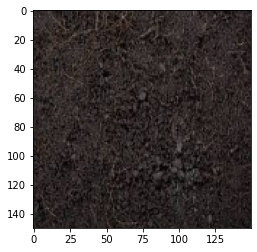

1/1 [==============================] - 0s 182ms/step
3 Peat soil
Predicted class 3


In [28]:
if __name__ == "__main__":
    
    class_names = ['Black soil',
              'Cinder soil',
              'Laterite soil',
              'Peat soil',
              'Yellow soil']
    img_width, img_height = 150,150
    # load dataset
    train, test = get_data()
    # define model
    model = get_model()
    # fit model
    fit_model = model.fit(train,validation_data=test,epochs = 1)
    
#     saving the model
    model.save('soil-model.h5')
    
    #load image
#     img = load_image("C:\\Users\\Saranya.Sakkarapani\\Downloads\\archive\\Soil_Types\\Test\\Black_Soil\\39.jpg")


    result = predict_soil("C:\\Users\\Saranya.Sakkarapani\\Downloads\\archive\\Soil_Types\\Test\\Black_Soil\\39.jpg")
    
#     max_confidence = np.argmax(result[0])
    
#     print(max_confidence, labels[max_confidence])

#     print('Predicted class', np.argmax(result))

